# Importing Libraries

In [46]:
import numpy as np
import pylab as pl
import math
import scipy.special as ss
import random
import matplotlib.pyplot as plt
from seaborn import set_style

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


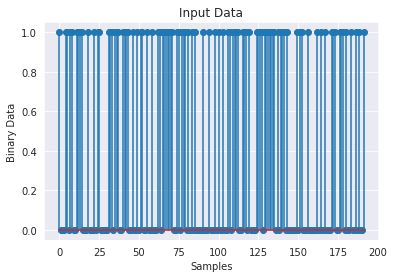

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


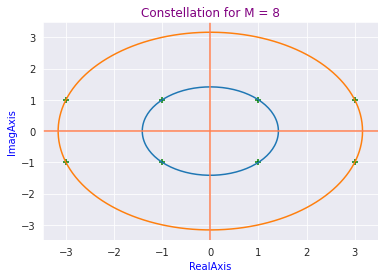

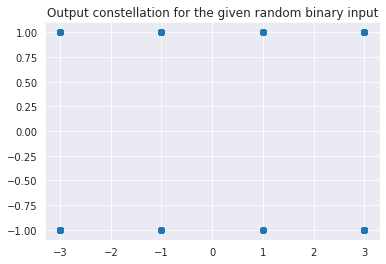

In [47]:
def bi2de(binary):
    bin_temp = 0
    bin_res = np.zeros(len(binary), dtype=int)
    for i in range(len(binary)):
        for j in range(len(binary[i])):
            bin_temp = bin_temp + binary[i][j] * (2 ** j)
        bin_res[i] = bin_temp
        bin_temp = 0
    return bin_res


def GetSquareConstellation(M):
    ini_phase = 0  
    nbits = np.log2(M)   
    if nbits == 3:
        # 8-QAM
        constellation = np.array([-3 + 1j, -3 - 1j, -1 + 1j,
                                  -1 - 1j, 1 + 1j, 1 - 1j, 3 + 1j, 3 - 1j])
    else:
        # Square QAM
        sqrtM = int(2 ** (nbits / 2))

        x = np.arange(-(sqrtM - 1), sqrtM, 2)
        y = np.arange(sqrtM - 1, -sqrtM, -2).reshape(-1, 1)
        constellation = x + y * 1j
        constellation = (constellation * np.exp(1j * ini_phase)
                         ).reshape(constellation.size, order='F')
    return constellation


def QuadratureAmplitudeModulation(x, M):
    if(x == np.array([])):
        return print('QAM Input Empty')
    else:
        y = np.array([])
        constellation = GetSquareConstellation(M)
        abso = np.abs(constellation)
        abso = set(abso)
        for i in abso:
          angle = np.linspace( 0 , 2 * np.pi , 150 ) 
          radius = i
          x1 = radius * np.cos( angle ) 
          y1 = radius * np.sin( angle )  
          plt.plot(x1, y1)
        set_style("darkgrid")
        M_str = str(M)
        stry = "Constellation for M = " + M_str
        plt.title(stry,color='purple')
        plt.scatter(np.real(constellation),np.imag(constellation),marker = "+", c = "green" )
        plt.axhline(0, color='coral')
        plt.axvline(0, color='coral')
        plt.xlabel("RealAxis", color = "blue")
        plt.ylabel("ImagAxis", color = "blue")
        plt.show()
        print("\n")
        for i in x:
            y = np.append(y, constellation[i])
    return y

  
# number of symbol
N = 8
# number of subcarriers
M = 8
# size of constellation
M_mod = 8
M_mod1 = 64
M_mod2 = 256
M_bits = int(np.log2(M_mod))
# number of symbols per frame
N_syms_perfram = N * M
# number of bits per frame
N_bits_perfram = N * M * M_bits

#random input bits generation
data_info_bit = np.random.randint(0, 2, N_bits_perfram)
plt.title("Input Data")
plt.xlabel("Samples")
plt.ylabel("Binary Data")
plt.stem(data_info_bit)
plt.show()
data_temp = bi2de(np.reshape(data_info_bit, (N_syms_perfram, M_bits), order='F'))
y = QuadratureAmplitudeModulation(data_temp, M_mod)
plt.title("Output constellation for the given random binary input")
plt.scatter(np.real(y), np.imag(y))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


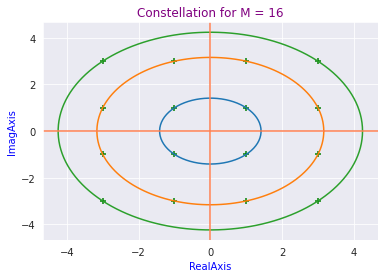

In [48]:
M_mod3 = 16
y3 = QuadratureAmplitudeModulation(data_temp, M_mod3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


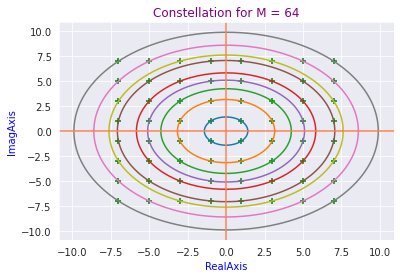

In [49]:
y1 = QuadratureAmplitudeModulation(data_temp, M_mod1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


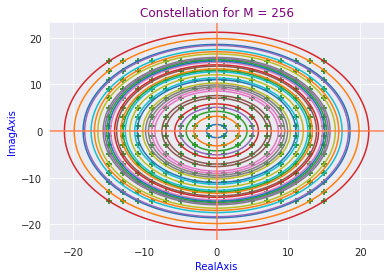

In [50]:
y2 = QuadratureAmplitudeModulation(data_temp, M_mod2)

# M-QAM

In [51]:

def ber_mqam(EbN0, M):
    k = math.log(M, 2)
    return 2 / k * (1 - 1 / math.sqrt(M)) * math.erfc(math.sqrt(3 * EbN0 * k/(2 * (M - 1))))

# Plot Of M-QAM

In [52]:
# M-QAM
def plot_ber_mqam():
    k = [4, 6, 8] 
    M = [2**x for x in k]
    for m in M:
        ber = [ber_mqam(eb, m) for eb in EbN0_lin]
        pl.plot(EbN0_dB, ber, label="%d-QAM" % m)

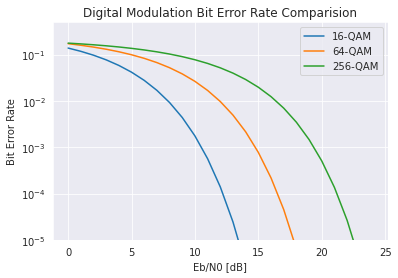

In [53]:
def main():
    start = 0
    end = 25
    step = 1
    
    global EbN0_dB
    EbN0_dB = range(start, end, step)
    # convert to linear
    global EbN0_lin
    EbN0_lin = [10**(float(x)/10) for x in EbN0_dB]
    #print EbN0_lin
        
    pl.figure(1)
    ax = pl.subplot(1, 1, 1)   
    plot_ber_mqam()
    
    ax.set_yscale('log')
    pl.ylim([10**-5, 0.5])
    pl.legend(loc='best')
    pl.title("Digital Modulation Bit Error Rate Comparision")
    pl.xlabel('Eb/N0 [dB]')
    pl.ylabel('Bit Error Rate')
    pl.show()
main()